In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
test=pd.read_excel("Data_Test.xlsx")

In [4]:
print(train.shape,test.shape)

(12690, 9) (4231, 8)


In [5]:
df=pd.concat([train,test],axis=0)

## EDA

In [6]:
df.sample(5)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
5673,New Delhi,1500.0,"Continental, North Indian, Italian",Gujranwala Town,4.2,1618,11am – 12midnight (Mon-Sun),"LOUNGE,CASUAL DINING",68 votes
321,New Delhi,NaN,BBQ,Malviya Nagar,3.9,5493,"4pm – 10:45pm (Mon, Wed, Thu, Fri, Sat, Sun)...",CASUAL DINING,67 votes
3334,Mumbai,1500.0,"North Indian, Chinese, Maharashtrian, Parsi",Chembur,4.0,15008,"12noon – 3pm, 7pm – 11:30pm (Mon-Sun)","CASUAL DINING,BAR",117 votes
2946,Bangalore,NaN,"Cafe, North Indian, Healthy Food, Mexican",Koramangala 5th Block,4.3,9683,11am – 11pm (Mon-Sun),CAFÉ,234 votes
3497,Bangalore,150.0,"Ice Cream, Desserts",Rajajinagar,3.4,11969,11am – 11pm (Mon-Sun),DESSERT PARLOR,8 votes


In [7]:
df.shape

(16921, 9)

In [8]:
df.isna().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [9]:
df.duplicated().sum()

26

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 9 columns):
CITY             16748 non-null object
COST             12665 non-null float64
CUISINES         16895 non-null object
LOCALITY         16767 non-null object
RATING           16891 non-null object
RESTAURANT_ID    16895 non-null int64
TIME             16895 non-null object
TITLE            16895 non-null object
VOTES            15293 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CITY,16748,450,Chennai,2854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COST,12665,NaN,NaN,NaN,655.401,627.39,20,300,500,800,14000
CUISINES,16895,5183,North Indian,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCALITY,16767,1636,Gachibowli,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATING,16891,32,3.9,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RESTAURANT_ID,16895,NaN,NaN,NaN,7765.92,4494.23,0,3869.5,7750,11672,15573
TIME,16895,3295,11am – 11pm (Mon-Sun),1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TITLE,16895,123,QUICK BITES,5627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VOTES,15293,2075,44 votes,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES'],
      dtype='object')

## LOCALITY

In [14]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [15]:
df.LOCALITY.nunique()

1636

In [16]:
df.LOCALITY.unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ...,
       'Off Carter Road', 'SRM Back Gate', 'Perry Cross Road'],
      dtype=object)

In [17]:
df.LOCALITY.value_counts()

Gachibowli                                  216
Indiranagar                                 186
Kakkanad                                    175
Kukatpally                                  171
Madhapur                                    169
Whitefield                                  164
Banjara Hills                               157
Edappally                                   154
HSR                                         148
Marathahalli                                148
Jubilee Hills                               144
Fort Kochi                                  138
BTM                                         131
Nungambakkam                                131
MG Road                                     127
Kaloor                                      123
Jayanagar                                   121
T. Nagar                                    116
Andheri West                                116
Kondapur                                    113
JP Nagar                                

## VOTES

In [18]:
df.VOTES.nunique()

2075

In [19]:
df.VOTES.value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
24 votes      81
26 votes      81
23 votes      80
28 votes      80
25 votes      79
35 votes      78
33 votes      77
38 votes      76
42 votes      75
57 votes      75
4 votes       75
13 votes      74
32 votes      74
12 votes      74
54 votes      73
15 votes      73
19 votes      73
27 votes      73
31 votes      72
37 votes      71
47 votes      71
55 votes      71
8 votes       71
52 votes      71
20 votes      71
41 votes      70
              ..
2632 votes     1
2235 votes     1
1060 votes     1
3039 votes     1
5469 votes     1
1552 votes     1
1930 votes     1
2747 votes     1
2493 votes     1
4186 votes     1
898 votes      1
1332 votes     1
1558 votes     1
1320 votes     1
2308 votes     1
2509 votes     1
1627 votes     1
3334 votes     1
2380 votes     1
1826 votes     1
1786 votes     1
2499 votes     1
4606 votes     1
2498 votes     1
2550 votes     1
4990 votes     1
2297 votes     1
1981 votes    

In [20]:
df.VOTES.isna().sum()

1602

In [21]:
df.VOTES.fillna(df.VOTES.mode()[0],inplace=True)

In [22]:
df.VOTES.isna().sum()

0

In [23]:
for i in df.VOTES:
    print(i,type(i))

49 votes <class 'str'>
30 votes <class 'str'>
221 votes <class 'str'>
24 votes <class 'str'>
165 votes <class 'str'>
550 votes <class 'str'>
509 votes <class 'str'>
1612 votes <class 'str'>
101 votes <class 'str'>
219 votes <class 'str'>
244 votes <class 'str'>
274 votes <class 'str'>
15 votes <class 'str'>
44 votes <class 'str'>
160 votes <class 'str'>
2499 votes <class 'str'>
319 votes <class 'str'>
121 votes <class 'str'>
535 votes <class 'str'>
350 votes <class 'str'>
400 votes <class 'str'>
1327 votes <class 'str'>
1191 votes <class 'str'>
533 votes <class 'str'>
493 votes <class 'str'>
372 votes <class 'str'>
105 votes <class 'str'>
178 votes <class 'str'>
150 votes <class 'str'>
2456 votes <class 'str'>
38 votes <class 'str'>
546 votes <class 'str'>
2228 votes <class 'str'>
250 votes <class 'str'>
132 votes <class 'str'>
7 votes <class 'str'>
41 votes <class 'str'>
69 votes <class 'str'>
299 votes <class 'str'>
15 votes <class 'str'>
68 votes <class 'str'>
44 votes <class 'str'>

111 votes <class 'str'>
27 votes <class 'str'>
6 votes <class 'str'>
27 votes <class 'str'>
105 votes <class 'str'>
35 votes <class 'str'>
6 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
359 votes <class 'str'>
140 votes <class 'str'>
11 votes <class 'str'>
82 votes <class 'str'>
44 votes <class 'str'>
117 votes <class 'str'>
44 votes <class 'str'>
196 votes <class 'str'>
48 votes <class 'str'>
5469 votes <class 'str'>
295 votes <class 'str'>
11 votes <class 'str'>
223 votes <class 'str'>
24 votes <class 'str'>
69 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
38 votes <class 'str'>
351 votes <class 'str'>
5 votes <class 'str'>
546 votes <class 'str'>
1097 votes <class 'str'>
352 votes <class 'str'>
44 votes <class 'str'>
31 votes <class 'str'>
139 votes <class 'str'>
30 votes <class 'str'>
160 votes <class 'str'>
7 votes <class 'str'>
64 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
19 votes <class 'str'>
44 votes <class 'str'

1670 votes <class 'str'>
17 votes <class 'str'>
228 votes <class 'str'>
133 votes <class 'str'>
26 votes <class 'str'>
269 votes <class 'str'>
22 votes <class 'str'>
46 votes <class 'str'>
561 votes <class 'str'>
140 votes <class 'str'>
137 votes <class 'str'>
111 votes <class 'str'>
45 votes <class 'str'>
94 votes <class 'str'>
122 votes <class 'str'>
171 votes <class 'str'>
590 votes <class 'str'>
1105 votes <class 'str'>
38 votes <class 'str'>
157 votes <class 'str'>
1300 votes <class 'str'>
708 votes <class 'str'>
331 votes <class 'str'>
451 votes <class 'str'>
765 votes <class 'str'>
44 votes <class 'str'>
67 votes <class 'str'>
26 votes <class 'str'>
910 votes <class 'str'>
29 votes <class 'str'>
44 votes <class 'str'>
270 votes <class 'str'>
4252 votes <class 'str'>
310 votes <class 'str'>
197 votes <class 'str'>
73 votes <class 'str'>
558 votes <class 'str'>
34 votes <class 'str'>
44 votes <class 'str'>
301 votes <class 'str'>
46 votes <class 'str'>
53 votes <class 'str'>
1828 

409 votes <class 'str'>
145 votes <class 'str'>
55 votes <class 'str'>
204 votes <class 'str'>
869 votes <class 'str'>
69 votes <class 'str'>
389 votes <class 'str'>
5 votes <class 'str'>
8 votes <class 'str'>
160 votes <class 'str'>
523 votes <class 'str'>
44 votes <class 'str'>
12 votes <class 'str'>
721 votes <class 'str'>
46 votes <class 'str'>
122 votes <class 'str'>
1042 votes <class 'str'>
621 votes <class 'str'>
187 votes <class 'str'>
3369 votes <class 'str'>
77 votes <class 'str'>
236 votes <class 'str'>
305 votes <class 'str'>
3227 votes <class 'str'>
152 votes <class 'str'>
892 votes <class 'str'>
53 votes <class 'str'>
30 votes <class 'str'>
64 votes <class 'str'>
167 votes <class 'str'>
135 votes <class 'str'>
883 votes <class 'str'>
942 votes <class 'str'>
671 votes <class 'str'>
44 votes <class 'str'>
42 votes <class 'str'>
53 votes <class 'str'>
39 votes <class 'str'>
2275 votes <class 'str'>
44 votes <class 'str'>
95 votes <class 'str'>
24 votes <class 'str'>
33 votes

245 votes <class 'str'>
75 votes <class 'str'>
89 votes <class 'str'>
17 votes <class 'str'>
1914 votes <class 'str'>
89 votes <class 'str'>
44 votes <class 'str'>
406 votes <class 'str'>
277 votes <class 'str'>
36 votes <class 'str'>
1109 votes <class 'str'>
54 votes <class 'str'>
978 votes <class 'str'>
30 votes <class 'str'>
337 votes <class 'str'>
46 votes <class 'str'>
67 votes <class 'str'>
557 votes <class 'str'>
64 votes <class 'str'>
632 votes <class 'str'>
1014 votes <class 'str'>
57 votes <class 'str'>
1810 votes <class 'str'>
44 votes <class 'str'>
120 votes <class 'str'>
482 votes <class 'str'>
6 votes <class 'str'>
204 votes <class 'str'>
1312 votes <class 'str'>
111 votes <class 'str'>
5 votes <class 'str'>
15 votes <class 'str'>
582 votes <class 'str'>
48 votes <class 'str'>
604 votes <class 'str'>
44 votes <class 'str'>
187 votes <class 'str'>
62 votes <class 'str'>
44 votes <class 'str'>
31 votes <class 'str'>
106 votes <class 'str'>
467 votes <class 'str'>
97 votes <

571 votes <class 'str'>
703 votes <class 'str'>
164 votes <class 'str'>
612 votes <class 'str'>
122 votes <class 'str'>
225 votes <class 'str'>
172 votes <class 'str'>
380 votes <class 'str'>
44 votes <class 'str'>
1336 votes <class 'str'>
909 votes <class 'str'>
378 votes <class 'str'>
451 votes <class 'str'>
1767 votes <class 'str'>
980 votes <class 'str'>
91 votes <class 'str'>
199 votes <class 'str'>
1268 votes <class 'str'>
187 votes <class 'str'>
1826 votes <class 'str'>
18 votes <class 'str'>
191 votes <class 'str'>
44 votes <class 'str'>
114 votes <class 'str'>
249 votes <class 'str'>
933 votes <class 'str'>
50 votes <class 'str'>
150 votes <class 'str'>
950 votes <class 'str'>
25 votes <class 'str'>
174 votes <class 'str'>
10 votes <class 'str'>
298 votes <class 'str'>
139 votes <class 'str'>
202 votes <class 'str'>
567 votes <class 'str'>
198 votes <class 'str'>
53 votes <class 'str'>
44 votes <class 'str'>
61 votes <class 'str'>
221 votes <class 'str'>
91 votes <class 'str'>

227 votes <class 'str'>
25 votes <class 'str'>
25 votes <class 'str'>
394 votes <class 'str'>
132 votes <class 'str'>
44 votes <class 'str'>
147 votes <class 'str'>
283 votes <class 'str'>
867 votes <class 'str'>
44 votes <class 'str'>
4 votes <class 'str'>
12 votes <class 'str'>
619 votes <class 'str'>
345 votes <class 'str'>
255 votes <class 'str'>
1531 votes <class 'str'>
90 votes <class 'str'>
262 votes <class 'str'>
760 votes <class 'str'>
641 votes <class 'str'>
1731 votes <class 'str'>
905 votes <class 'str'>
134 votes <class 'str'>
1640 votes <class 'str'>
49 votes <class 'str'>
1302 votes <class 'str'>
111 votes <class 'str'>
2750 votes <class 'str'>
1539 votes <class 'str'>
930 votes <class 'str'>
133 votes <class 'str'>
84 votes <class 'str'>
5227 votes <class 'str'>
267 votes <class 'str'>
375 votes <class 'str'>
71 votes <class 'str'>
16 votes <class 'str'>
20 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
14 votes <class 'str'>
1272 votes <class 'str'>


44 votes <class 'str'>
591 votes <class 'str'>
133 votes <class 'str'>
118 votes <class 'str'>
44 votes <class 'str'>
58 votes <class 'str'>
465 votes <class 'str'>
661 votes <class 'str'>
918 votes <class 'str'>
362 votes <class 'str'>
506 votes <class 'str'>
563 votes <class 'str'>
66 votes <class 'str'>
170 votes <class 'str'>
38 votes <class 'str'>
116 votes <class 'str'>
21 votes <class 'str'>
514 votes <class 'str'>
44 votes <class 'str'>
171 votes <class 'str'>
44 votes <class 'str'>
380 votes <class 'str'>
72 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
240 votes <class 'str'>
44 votes <class 'str'>
778 votes <class 'str'>
304 votes <class 'str'>
16 votes <class 'str'>
179 votes <class 'str'>
178 votes <class 'str'>
47 votes <class 'str'>
45 votes <class 'str'>
597 votes <class 'str'>
37 votes <class 'str'>
1164 votes <class 'str'>
217 votes <class 'str'>
127 votes <class 'str'>
840 votes <class 'str'>
561 votes <class 'str'>
62 votes <class 'str'>
145 vote

171 votes <class 'str'>
732 votes <class 'str'>
66 votes <class 'str'>
30 votes <class 'str'>
181 votes <class 'str'>
80 votes <class 'str'>
3871 votes <class 'str'>
44 votes <class 'str'>
504 votes <class 'str'>
57 votes <class 'str'>
196 votes <class 'str'>
472 votes <class 'str'>
44 votes <class 'str'>
113 votes <class 'str'>
463 votes <class 'str'>
196 votes <class 'str'>
14 votes <class 'str'>
44 votes <class 'str'>
376 votes <class 'str'>
12 votes <class 'str'>
20 votes <class 'str'>
29 votes <class 'str'>
26 votes <class 'str'>
488 votes <class 'str'>
32 votes <class 'str'>
349 votes <class 'str'>
29 votes <class 'str'>
194 votes <class 'str'>
4635 votes <class 'str'>
913 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
65 votes <class 'str'>
286 votes <class 'str'>
115 votes <class 'str'>
277 votes <class 'str'>
946 votes <class 'str'>
284 votes <class 'str'>
23 votes <class 'str'>
10 votes <class 'str'>
398 votes <class 'str'>
44 votes <class 'str'>
501 votes 

25 votes <class 'str'>
69 votes <class 'str'>
160 votes <class 'str'>
58 votes <class 'str'>
15 votes <class 'str'>
532 votes <class 'str'>
18 votes <class 'str'>
82 votes <class 'str'>
546 votes <class 'str'>
20 votes <class 'str'>
13 votes <class 'str'>
86 votes <class 'str'>
44 votes <class 'str'>
22 votes <class 'str'>
192 votes <class 'str'>
190 votes <class 'str'>
8 votes <class 'str'>
1572 votes <class 'str'>
89 votes <class 'str'>
364 votes <class 'str'>
55 votes <class 'str'>
494 votes <class 'str'>
83 votes <class 'str'>
157 votes <class 'str'>
44 votes <class 'str'>
7 votes <class 'str'>
415 votes <class 'str'>
375 votes <class 'str'>
53 votes <class 'str'>
760 votes <class 'str'>
42 votes <class 'str'>
44 votes <class 'str'>
89 votes <class 'str'>
33 votes <class 'str'>
179 votes <class 'str'>
44 votes <class 'str'>
112 votes <class 'str'>
355 votes <class 'str'>
580 votes <class 'str'>
38 votes <class 'str'>
325 votes <class 'str'>
826 votes <class 'str'>
207 votes <class 

2694 votes <class 'str'>
1111 votes <class 'str'>
212 votes <class 'str'>
235 votes <class 'str'>
237 votes <class 'str'>
16 votes <class 'str'>
24 votes <class 'str'>
385 votes <class 'str'>
311 votes <class 'str'>
41 votes <class 'str'>
75 votes <class 'str'>
108 votes <class 'str'>
219 votes <class 'str'>
292 votes <class 'str'>
44 votes <class 'str'>
287 votes <class 'str'>
4 votes <class 'str'>
13 votes <class 'str'>
1791 votes <class 'str'>
728 votes <class 'str'>
647 votes <class 'str'>
73 votes <class 'str'>
213 votes <class 'str'>
6 votes <class 'str'>
495 votes <class 'str'>
45 votes <class 'str'>
95 votes <class 'str'>
44 votes <class 'str'>
161 votes <class 'str'>
22 votes <class 'str'>
205 votes <class 'str'>
34 votes <class 'str'>
1374 votes <class 'str'>
277 votes <class 'str'>
44 votes <class 'str'>
2891 votes <class 'str'>
388 votes <class 'str'>
825 votes <class 'str'>
44 votes <class 'str'>
10 votes <class 'str'>
749 votes <class 'str'>
161 votes <class 'str'>
189 vo

233 votes <class 'str'>
1394 votes <class 'str'>
44 votes <class 'str'>
64 votes <class 'str'>
312 votes <class 'str'>
566 votes <class 'str'>
51 votes <class 'str'>
355 votes <class 'str'>
26 votes <class 'str'>
9 votes <class 'str'>
688 votes <class 'str'>
548 votes <class 'str'>
329 votes <class 'str'>
512 votes <class 'str'>
85 votes <class 'str'>
342 votes <class 'str'>
108 votes <class 'str'>
1248 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
30 votes <class 'str'>
44 votes <class 'str'>
1585 votes <class 'str'>
44 votes <class 'str'>
29 votes <class 'str'>
67 votes <class 'str'>
94 votes <class 'str'>
44 votes <class 'str'>
353 votes <class 'str'>
41 votes <class 'str'>
44 votes <class 'str'>
28 votes <class 'str'>
52 votes <class 'str'>
9 votes <class 'str'>
214 votes <class 'str'>
352 votes <class 'str'>
83 votes <class 'str'>
269 votes <class 'str'>
294 votes <class 'str'>
118 votes <class 'str'>
4 votes <class 'str'>
44 votes <class 'str'>
810 votes <clas

1872 votes <class 'str'>
169 votes <class 'str'>
1208 votes <class 'str'>
369 votes <class 'str'>
82 votes <class 'str'>
813 votes <class 'str'>
11 votes <class 'str'>
99 votes <class 'str'>
33 votes <class 'str'>
66 votes <class 'str'>
176 votes <class 'str'>
30 votes <class 'str'>
25 votes <class 'str'>
314 votes <class 'str'>
46 votes <class 'str'>
252 votes <class 'str'>
5 votes <class 'str'>
3471 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
30 votes <class 'str'>
347 votes <class 'str'>
237 votes <class 'str'>
67 votes <class 'str'>
622 votes <class 'str'>
6 votes <class 'str'>
763 votes <class 'str'>
21 votes <class 'str'>
286 votes <class 'str'>
127 votes <class 'str'>
475 votes <class 'str'>
52 votes <class 'str'>
51 votes <class 'str'>
250 votes <class 'str'>
118 votes <class 'str'>
44 votes <class 'str'>
43 votes <class 'str'>
180 votes <class 'str'>
10 votes <class 'str'>
2230 votes <class 'str'>
97 votes <class 'str'>
569 votes <class 'str'>
361 votes <

119 votes <class 'str'>
955 votes <class 'str'>
234 votes <class 'str'>
28 votes <class 'str'>
643 votes <class 'str'>
1256 votes <class 'str'>
152 votes <class 'str'>
43 votes <class 'str'>
262 votes <class 'str'>
293 votes <class 'str'>
5 votes <class 'str'>
702 votes <class 'str'>
169 votes <class 'str'>
44 votes <class 'str'>
366 votes <class 'str'>
8 votes <class 'str'>
310 votes <class 'str'>
221 votes <class 'str'>
2397 votes <class 'str'>
53 votes <class 'str'>
104 votes <class 'str'>
274 votes <class 'str'>
1221 votes <class 'str'>
639 votes <class 'str'>
38 votes <class 'str'>
11 votes <class 'str'>
877 votes <class 'str'>
107 votes <class 'str'>
37 votes <class 'str'>
193 votes <class 'str'>
251 votes <class 'str'>
468 votes <class 'str'>
16 votes <class 'str'>
25 votes <class 'str'>
50 votes <class 'str'>
862 votes <class 'str'>
146 votes <class 'str'>
44 votes <class 'str'>
120 votes <class 'str'>
18 votes <class 'str'>
129 votes <class 'str'>
160 votes <class 'str'>
145 v

73 votes <class 'str'>
214 votes <class 'str'>
92 votes <class 'str'>
5724 votes <class 'str'>
44 votes <class 'str'>
283 votes <class 'str'>
113 votes <class 'str'>
638 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
41 votes <class 'str'>
41 votes <class 'str'>
516 votes <class 'str'>
320 votes <class 'str'>
1578 votes <class 'str'>
1310 votes <class 'str'>
16 votes <class 'str'>
90 votes <class 'str'>
49 votes <class 'str'>
474 votes <class 'str'>
269 votes <class 'str'>
410 votes <class 'str'>
1512 votes <class 'str'>
33 votes <class 'str'>
419 votes <class 'str'>
27 votes <class 'str'>
2043 votes <class 'str'>
22 votes <class 'str'>
118 votes <class 'str'>
309 votes <class 'str'>
1066 votes <class 'str'>
26 votes <class 'str'>
504 votes <class 'str'>
434 votes <class 'str'>
104 votes <class 'str'>
84 votes <class 'str'>
187 votes <class 'str'>
177 votes <class 'str'>
1256 votes <class 'str'>
257 votes <class 'str'>
112 votes <class 'str'>
647 votes <class 'str'>


63 votes <class 'str'>
4 votes <class 'str'>
82 votes <class 'str'>
6 votes <class 'str'>
288 votes <class 'str'>
567 votes <class 'str'>
94 votes <class 'str'>
54 votes <class 'str'>
231 votes <class 'str'>
224 votes <class 'str'>
81 votes <class 'str'>
156 votes <class 'str'>
299 votes <class 'str'>
44 votes <class 'str'>
272 votes <class 'str'>
227 votes <class 'str'>
576 votes <class 'str'>
368 votes <class 'str'>
37 votes <class 'str'>
2972 votes <class 'str'>
44 votes <class 'str'>
783 votes <class 'str'>
26 votes <class 'str'>
338 votes <class 'str'>
23 votes <class 'str'>
1463 votes <class 'str'>
70 votes <class 'str'>
1607 votes <class 'str'>
144 votes <class 'str'>
1065 votes <class 'str'>
1621 votes <class 'str'>
176 votes <class 'str'>
61 votes <class 'str'>
75 votes <class 'str'>
58 votes <class 'str'>
44 votes <class 'str'>
111 votes <class 'str'>
111 votes <class 'str'>
502 votes <class 'str'>
294 votes <class 'str'>
172 votes <class 'str'>
542 votes <class 'str'>
399 vo

21 votes <class 'str'>
187 votes <class 'str'>
95 votes <class 'str'>
1554 votes <class 'str'>
618 votes <class 'str'>
8 votes <class 'str'>
181 votes <class 'str'>
60 votes <class 'str'>
49 votes <class 'str'>
81 votes <class 'str'>
1139 votes <class 'str'>
15 votes <class 'str'>
37 votes <class 'str'>
528 votes <class 'str'>
62 votes <class 'str'>
48 votes <class 'str'>
45 votes <class 'str'>
232 votes <class 'str'>
257 votes <class 'str'>
44 votes <class 'str'>
356 votes <class 'str'>
44 votes <class 'str'>
515 votes <class 'str'>
929 votes <class 'str'>
130 votes <class 'str'>
185 votes <class 'str'>
78 votes <class 'str'>
29 votes <class 'str'>
180 votes <class 'str'>
335 votes <class 'str'>
44 votes <class 'str'>
972 votes <class 'str'>
385 votes <class 'str'>
231 votes <class 'str'>
33 votes <class 'str'>
1751 votes <class 'str'>
11 votes <class 'str'>
313 votes <class 'str'>
43 votes <class 'str'>
117 votes <class 'str'>
78 votes <class 'str'>
65 votes <class 'str'>
350 votes <

3399 votes <class 'str'>
44 votes <class 'str'>
195 votes <class 'str'>
177 votes <class 'str'>
233 votes <class 'str'>
7 votes <class 'str'>
257 votes <class 'str'>
1393 votes <class 'str'>
1051 votes <class 'str'>
59 votes <class 'str'>
65 votes <class 'str'>
32 votes <class 'str'>
878 votes <class 'str'>
16 votes <class 'str'>
29 votes <class 'str'>
705 votes <class 'str'>
461 votes <class 'str'>
29 votes <class 'str'>
224 votes <class 'str'>
41 votes <class 'str'>
532 votes <class 'str'>
44 votes <class 'str'>
538 votes <class 'str'>
12 votes <class 'str'>
135 votes <class 'str'>
370 votes <class 'str'>
131 votes <class 'str'>
108 votes <class 'str'>
72 votes <class 'str'>
22 votes <class 'str'>
770 votes <class 'str'>
44 votes <class 'str'>
224 votes <class 'str'>
144 votes <class 'str'>
597 votes <class 'str'>
29 votes <class 'str'>
26 votes <class 'str'>
230 votes <class 'str'>
41 votes <class 'str'>
42 votes <class 'str'>
227 votes <class 'str'>
7 votes <class 'str'>
2627 votes

150 votes <class 'str'>
813 votes <class 'str'>
358 votes <class 'str'>
203 votes <class 'str'>
882 votes <class 'str'>
31 votes <class 'str'>
240 votes <class 'str'>
44 votes <class 'str'>
53 votes <class 'str'>
1430 votes <class 'str'>
44 votes <class 'str'>
2480 votes <class 'str'>
504 votes <class 'str'>
38 votes <class 'str'>
40 votes <class 'str'>
175 votes <class 'str'>
386 votes <class 'str'>
452 votes <class 'str'>
44 votes <class 'str'>
38 votes <class 'str'>
752 votes <class 'str'>
45 votes <class 'str'>
725 votes <class 'str'>
52 votes <class 'str'>
17 votes <class 'str'>
32 votes <class 'str'>
421 votes <class 'str'>
21 votes <class 'str'>
115 votes <class 'str'>
48 votes <class 'str'>
18 votes <class 'str'>
329 votes <class 'str'>
63 votes <class 'str'>
73 votes <class 'str'>
2171 votes <class 'str'>
50 votes <class 'str'>
997 votes <class 'str'>
253 votes <class 'str'>
59 votes <class 'str'>
30 votes <class 'str'>
22 votes <class 'str'>
114 votes <class 'str'>
44 votes <

123 votes <class 'str'>
553 votes <class 'str'>
50 votes <class 'str'>
101 votes <class 'str'>
63 votes <class 'str'>
198 votes <class 'str'>
44 votes <class 'str'>
35 votes <class 'str'>
44 votes <class 'str'>
162 votes <class 'str'>
13 votes <class 'str'>
119 votes <class 'str'>
310 votes <class 'str'>
137 votes <class 'str'>
489 votes <class 'str'>
255 votes <class 'str'>
150 votes <class 'str'>
16 votes <class 'str'>
291 votes <class 'str'>
450 votes <class 'str'>
775 votes <class 'str'>
65 votes <class 'str'>
502 votes <class 'str'>
553 votes <class 'str'>
450 votes <class 'str'>
44 votes <class 'str'>
137 votes <class 'str'>
346 votes <class 'str'>
469 votes <class 'str'>
128 votes <class 'str'>
44 votes <class 'str'>
285 votes <class 'str'>
406 votes <class 'str'>
532 votes <class 'str'>
200 votes <class 'str'>
44 votes <class 'str'>
129 votes <class 'str'>
65 votes <class 'str'>
79 votes <class 'str'>
401 votes <class 'str'>
1083 votes <class 'str'>
1317 votes <class 'str'>
367

270 votes <class 'str'>
189 votes <class 'str'>
321 votes <class 'str'>
187 votes <class 'str'>
449 votes <class 'str'>
2395 votes <class 'str'>
373 votes <class 'str'>
44 votes <class 'str'>
423 votes <class 'str'>
119 votes <class 'str'>
2749 votes <class 'str'>
227 votes <class 'str'>
290 votes <class 'str'>
2335 votes <class 'str'>
300 votes <class 'str'>
318 votes <class 'str'>
225 votes <class 'str'>
228 votes <class 'str'>
28 votes <class 'str'>
58 votes <class 'str'>
601 votes <class 'str'>
34 votes <class 'str'>
452 votes <class 'str'>
44 votes <class 'str'>
25 votes <class 'str'>
62 votes <class 'str'>
19 votes <class 'str'>
34 votes <class 'str'>
39 votes <class 'str'>
161 votes <class 'str'>
36 votes <class 'str'>
211 votes <class 'str'>
48 votes <class 'str'>
23 votes <class 'str'>
44 votes <class 'str'>
79 votes <class 'str'>
309 votes <class 'str'>
33 votes <class 'str'>
88 votes <class 'str'>
237 votes <class 'str'>
413 votes <class 'str'>
62 votes <class 'str'>
245 vot

19 votes <class 'str'>
44 votes <class 'str'>
242 votes <class 'str'>
472 votes <class 'str'>
398 votes <class 'str'>
80 votes <class 'str'>
69 votes <class 'str'>
395 votes <class 'str'>
116 votes <class 'str'>
246 votes <class 'str'>
1660 votes <class 'str'>
438 votes <class 'str'>
262 votes <class 'str'>
541 votes <class 'str'>
44 votes <class 'str'>
218 votes <class 'str'>
186 votes <class 'str'>
116 votes <class 'str'>
42 votes <class 'str'>
143 votes <class 'str'>
508 votes <class 'str'>
9 votes <class 'str'>
1113 votes <class 'str'>
52 votes <class 'str'>
218 votes <class 'str'>
38 votes <class 'str'>
248 votes <class 'str'>
793 votes <class 'str'>
169 votes <class 'str'>
3070 votes <class 'str'>
64 votes <class 'str'>
24 votes <class 'str'>
243 votes <class 'str'>
645 votes <class 'str'>
125 votes <class 'str'>
95 votes <class 'str'>
680 votes <class 'str'>
1044 votes <class 'str'>
82 votes <class 'str'>
44 votes <class 'str'>
48 votes <class 'str'>
332 votes <class 'str'>
115 

222 votes <class 'str'>
193 votes <class 'str'>
381 votes <class 'str'>
44 votes <class 'str'>
28 votes <class 'str'>
44 votes <class 'str'>
39 votes <class 'str'>
44 votes <class 'str'>
195 votes <class 'str'>
16 votes <class 'str'>
34 votes <class 'str'>
935 votes <class 'str'>
274 votes <class 'str'>
809 votes <class 'str'>
79 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
1792 votes <class 'str'>
188 votes <class 'str'>
44 votes <class 'str'>
200 votes <class 'str'>
106 votes <class 'str'>
24 votes <class 'str'>
8 votes <class 'str'>
149 votes <class 'str'>
190 votes <class 'str'>
1638 votes <class 'str'>
20 votes <class 'str'>
31 votes <class 'str'>
80 votes <class 'str'>
156 votes <class 'str'>
35 votes <class 'str'>
632 votes <class 'str'>
108 votes <class 'str'>
44 votes <class 'str'>
595 votes <class 'str'>
44 votes <class 'str'>
1021 votes <class 'str'>
2375 votes <class 'str'>
44 votes <class 'str'>
193 votes <class 'str'>
271 votes <class 'str'>
565 votes

250 votes <class 'str'>
56 votes <class 'str'>
22 votes <class 'str'>
128 votes <class 'str'>
73 votes <class 'str'>
693 votes <class 'str'>
4 votes <class 'str'>
615 votes <class 'str'>
4181 votes <class 'str'>
581 votes <class 'str'>
459 votes <class 'str'>
29 votes <class 'str'>
67 votes <class 'str'>
386 votes <class 'str'>
20 votes <class 'str'>
145 votes <class 'str'>
20 votes <class 'str'>
67 votes <class 'str'>
44 votes <class 'str'>
60 votes <class 'str'>
706 votes <class 'str'>
47 votes <class 'str'>
40 votes <class 'str'>
127 votes <class 'str'>
50 votes <class 'str'>
714 votes <class 'str'>
81 votes <class 'str'>
139 votes <class 'str'>
135 votes <class 'str'>
1241 votes <class 'str'>
8 votes <class 'str'>
392 votes <class 'str'>
321 votes <class 'str'>
459 votes <class 'str'>
401 votes <class 'str'>
42 votes <class 'str'>
55 votes <class 'str'>
30 votes <class 'str'>
44 votes <class 'str'>
19 votes <class 'str'>
44 votes <class 'str'>
339 votes <class 'str'>
238 votes <cla

147 votes <class 'str'>
114 votes <class 'str'>
44 votes <class 'str'>
28 votes <class 'str'>
962 votes <class 'str'>
413 votes <class 'str'>
12 votes <class 'str'>
397 votes <class 'str'>
538 votes <class 'str'>
94 votes <class 'str'>
526 votes <class 'str'>
2286 votes <class 'str'>
197 votes <class 'str'>
38 votes <class 'str'>
298 votes <class 'str'>
211 votes <class 'str'>
334 votes <class 'str'>
55 votes <class 'str'>
112 votes <class 'str'>
107 votes <class 'str'>
63 votes <class 'str'>
1172 votes <class 'str'>
57 votes <class 'str'>
310 votes <class 'str'>
1609 votes <class 'str'>
788 votes <class 'str'>
42 votes <class 'str'>
128 votes <class 'str'>
225 votes <class 'str'>
1180 votes <class 'str'>
44 votes <class 'str'>
15 votes <class 'str'>
145 votes <class 'str'>
417 votes <class 'str'>
59 votes <class 'str'>
118 votes <class 'str'>
193 votes <class 'str'>
28 votes <class 'str'>
559 votes <class 'str'>
16 votes <class 'str'>
57 votes <class 'str'>
107 votes <class 'str'>
71 

762 votes <class 'str'>
22 votes <class 'str'>
363 votes <class 'str'>
44 votes <class 'str'>
123 votes <class 'str'>
1839 votes <class 'str'>
698 votes <class 'str'>
32 votes <class 'str'>
2030 votes <class 'str'>
635 votes <class 'str'>
118 votes <class 'str'>
5 votes <class 'str'>
188 votes <class 'str'>
33 votes <class 'str'>
891 votes <class 'str'>
44 votes <class 'str'>
46 votes <class 'str'>
174 votes <class 'str'>
533 votes <class 'str'>
33 votes <class 'str'>
191 votes <class 'str'>
473 votes <class 'str'>
5 votes <class 'str'>
75 votes <class 'str'>
484 votes <class 'str'>
54 votes <class 'str'>
401 votes <class 'str'>
313 votes <class 'str'>
14 votes <class 'str'>
70 votes <class 'str'>
27 votes <class 'str'>
279 votes <class 'str'>
155 votes <class 'str'>
55 votes <class 'str'>
193 votes <class 'str'>
446 votes <class 'str'>
186 votes <class 'str'>
50 votes <class 'str'>
248 votes <class 'str'>
57 votes <class 'str'>
86 votes <class 'str'>
106 votes <class 'str'>
45 votes <

218 votes <class 'str'>
92 votes <class 'str'>
9 votes <class 'str'>
921 votes <class 'str'>
295 votes <class 'str'>
26 votes <class 'str'>
441 votes <class 'str'>
675 votes <class 'str'>
13 votes <class 'str'>
130 votes <class 'str'>
42 votes <class 'str'>
1002 votes <class 'str'>
367 votes <class 'str'>
83 votes <class 'str'>
270 votes <class 'str'>
313 votes <class 'str'>
85 votes <class 'str'>
14 votes <class 'str'>
46 votes <class 'str'>
904 votes <class 'str'>
44 votes <class 'str'>
57 votes <class 'str'>
75 votes <class 'str'>
183 votes <class 'str'>
36 votes <class 'str'>
44 votes <class 'str'>
23 votes <class 'str'>
564 votes <class 'str'>
1601 votes <class 'str'>
94 votes <class 'str'>
399 votes <class 'str'>
629 votes <class 'str'>
144 votes <class 'str'>
98 votes <class 'str'>
285 votes <class 'str'>
785 votes <class 'str'>
151 votes <class 'str'>
338 votes <class 'str'>
24 votes <class 'str'>
591 votes <class 'str'>
70 votes <class 'str'>
92 votes <class 'str'>
44 votes <c

551 votes <class 'str'>
44 votes <class 'str'>
153 votes <class 'str'>
440 votes <class 'str'>
1380 votes <class 'str'>
170 votes <class 'str'>
44 votes <class 'str'>
371 votes <class 'str'>
2055 votes <class 'str'>
93 votes <class 'str'>
275 votes <class 'str'>
75 votes <class 'str'>
643 votes <class 'str'>
128 votes <class 'str'>
18 votes <class 'str'>
44 votes <class 'str'>
519 votes <class 'str'>
4 votes <class 'str'>
243 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
405 votes <class 'str'>
113 votes <class 'str'>
107 votes <class 'str'>
2011 votes <class 'str'>
552 votes <class 'str'>
413 votes <class 'str'>
431 votes <class 'str'>
138 votes <class 'str'>
80 votes <class 'str'>
50 votes <class 'str'>
373 votes <class 'str'>
87 votes <class 'str'>
44 votes <class 'str'>
569 votes <class 'str'>
501 votes <class 'str'>
452 votes <class 'str'>
44 votes <class 'str'>
107 votes <class 'str'>
428 votes <class 'str'>
202 votes <class 'str'>
421 votes <class 'str'>
1071

143 votes <class 'str'>
102 votes <class 'str'>
46 votes <class 'str'>
44 votes <class 'str'>
403 votes <class 'str'>
1002 votes <class 'str'>
1434 votes <class 'str'>
286 votes <class 'str'>
44 votes <class 'str'>
178 votes <class 'str'>
167 votes <class 'str'>
96 votes <class 'str'>
236 votes <class 'str'>
270 votes <class 'str'>
18 votes <class 'str'>
255 votes <class 'str'>
62 votes <class 'str'>
52 votes <class 'str'>
1025 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
25 votes <class 'str'>
241 votes <class 'str'>
265 votes <class 'str'>
42 votes <class 'str'>
24 votes <class 'str'>
50 votes <class 'str'>
34 votes <class 'str'>
915 votes <class 'str'>
42 votes <class 'str'>
218 votes <class 'str'>
94 votes <class 'str'>
191 votes <class 'str'>
231 votes <class 'str'>
57 votes <class 'str'>
15 votes <class 'str'>
1414 votes <class 'str'>
2877 votes <class 'str'>
233 votes <class 'str'>
218 votes <class 'str'>
553 votes <class 'str'>
44 votes <class 'str'>
2857 v

319 votes <class 'str'>
62 votes <class 'str'>
1722 votes <class 'str'>
77 votes <class 'str'>
937 votes <class 'str'>
94 votes <class 'str'>
241 votes <class 'str'>
58 votes <class 'str'>
68 votes <class 'str'>
637 votes <class 'str'>
930 votes <class 'str'>
135 votes <class 'str'>
1516 votes <class 'str'>
301 votes <class 'str'>
15 votes <class 'str'>
41 votes <class 'str'>
516 votes <class 'str'>
1349 votes <class 'str'>
13 votes <class 'str'>
175 votes <class 'str'>
34 votes <class 'str'>
109 votes <class 'str'>
921 votes <class 'str'>
679 votes <class 'str'>
247 votes <class 'str'>
109 votes <class 'str'>
62 votes <class 'str'>
354 votes <class 'str'>
2566 votes <class 'str'>
482 votes <class 'str'>
1046 votes <class 'str'>
903 votes <class 'str'>
243 votes <class 'str'>
49 votes <class 'str'>
277 votes <class 'str'>
44 votes <class 'str'>
350 votes <class 'str'>
14 votes <class 'str'>
58 votes <class 'str'>
44 votes <class 'str'>
5 votes <class 'str'>
12 votes <class 'str'>
190 v

130 votes <class 'str'>
406 votes <class 'str'>
198 votes <class 'str'>
150 votes <class 'str'>
130 votes <class 'str'>
25 votes <class 'str'>
527 votes <class 'str'>
100 votes <class 'str'>
250 votes <class 'str'>
39 votes <class 'str'>
2097 votes <class 'str'>
4761 votes <class 'str'>
66 votes <class 'str'>
449 votes <class 'str'>
74 votes <class 'str'>
70 votes <class 'str'>
44 votes <class 'str'>
58 votes <class 'str'>
71 votes <class 'str'>
858 votes <class 'str'>
36 votes <class 'str'>
605 votes <class 'str'>
78 votes <class 'str'>
260 votes <class 'str'>
195 votes <class 'str'>
595 votes <class 'str'>
52 votes <class 'str'>
91 votes <class 'str'>
181 votes <class 'str'>
107 votes <class 'str'>
34 votes <class 'str'>
625 votes <class 'str'>
1142 votes <class 'str'>
46 votes <class 'str'>
11 votes <class 'str'>
2267 votes <class 'str'>
460 votes <class 'str'>
144 votes <class 'str'>
135 votes <class 'str'>
53 votes <class 'str'>
62 votes <class 'str'>
44 votes <class 'str'>
89 vot

141 votes <class 'str'>
1649 votes <class 'str'>
1605 votes <class 'str'>
92 votes <class 'str'>
7 votes <class 'str'>
652 votes <class 'str'>
42 votes <class 'str'>
1087 votes <class 'str'>
292 votes <class 'str'>
454 votes <class 'str'>
89 votes <class 'str'>
44 votes <class 'str'>
1276 votes <class 'str'>
567 votes <class 'str'>
44 votes <class 'str'>
64 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
210 votes <class 'str'>
9 votes <class 'str'>
44 votes <class 'str'>
115 votes <class 'str'>
1046 votes <class 'str'>
720 votes <class 'str'>
26 votes <class 'str'>
1267 votes <class 'str'>
470 votes <class 'str'>
121 votes <class 'str'>
1136 votes <class 'str'>
19 votes <class 'str'>
44 votes <class 'str'>
240 votes <class 'str'>
1192 votes <class 'str'>
597 votes <class 'str'>
217 votes <class 'str'>
3972 votes <class 'str'>
813 votes <class 'str'>
3160 votes <class 'str'>
12 votes <class 'str'>
106 votes <class 'str'>
227 votes <class 'str'>
445 votes <class 'str'>

264 votes <class 'str'>
74 votes <class 'str'>
341 votes <class 'str'>
35 votes <class 'str'>
79 votes <class 'str'>
29 votes <class 'str'>
166 votes <class 'str'>
118 votes <class 'str'>
13 votes <class 'str'>
44 votes <class 'str'>
69 votes <class 'str'>
44 votes <class 'str'>
182 votes <class 'str'>
47 votes <class 'str'>
667 votes <class 'str'>
19 votes <class 'str'>
859 votes <class 'str'>
32 votes <class 'str'>
118 votes <class 'str'>
1011 votes <class 'str'>
4960 votes <class 'str'>
139 votes <class 'str'>
1035 votes <class 'str'>
1037 votes <class 'str'>
382 votes <class 'str'>
242 votes <class 'str'>
140 votes <class 'str'>
50 votes <class 'str'>
81 votes <class 'str'>
177 votes <class 'str'>
2586 votes <class 'str'>
44 votes <class 'str'>
1571 votes <class 'str'>
361 votes <class 'str'>
55 votes <class 'str'>
44 votes <class 'str'>
647 votes <class 'str'>
102 votes <class 'str'>
53 votes <class 'str'>
1834 votes <class 'str'>
69 votes <class 'str'>
410 votes <class 'str'>
111

259 votes <class 'str'>
204 votes <class 'str'>
186 votes <class 'str'>
130 votes <class 'str'>
236 votes <class 'str'>
96 votes <class 'str'>
44 votes <class 'str'>
205 votes <class 'str'>
75 votes <class 'str'>
1308 votes <class 'str'>
2259 votes <class 'str'>
436 votes <class 'str'>
6 votes <class 'str'>
44 votes <class 'str'>
115 votes <class 'str'>
464 votes <class 'str'>
214 votes <class 'str'>
162 votes <class 'str'>
7 votes <class 'str'>
120 votes <class 'str'>
22 votes <class 'str'>
4 votes <class 'str'>
4 votes <class 'str'>
1134 votes <class 'str'>
151 votes <class 'str'>
1954 votes <class 'str'>
281 votes <class 'str'>
14 votes <class 'str'>
2248 votes <class 'str'>
235 votes <class 'str'>
136 votes <class 'str'>
16 votes <class 'str'>
273 votes <class 'str'>
464 votes <class 'str'>
38 votes <class 'str'>
56 votes <class 'str'>
115 votes <class 'str'>
4 votes <class 'str'>
44 votes <class 'str'>
13 votes <class 'str'>
490 votes <class 'str'>
1897 votes <class 'str'>
26 vote

55 votes <class 'str'>
44 votes <class 'str'>
234 votes <class 'str'>
961 votes <class 'str'>
29 votes <class 'str'>
6 votes <class 'str'>
9 votes <class 'str'>
51 votes <class 'str'>
586 votes <class 'str'>
242 votes <class 'str'>
29 votes <class 'str'>
44 votes <class 'str'>
44 votes <class 'str'>
48 votes <class 'str'>
606 votes <class 'str'>
664 votes <class 'str'>
27 votes <class 'str'>
69 votes <class 'str'>
161 votes <class 'str'>
1294 votes <class 'str'>
118 votes <class 'str'>
474 votes <class 'str'>
2996 votes <class 'str'>
129 votes <class 'str'>
16 votes <class 'str'>
16 votes <class 'str'>
569 votes <class 'str'>
3049 votes <class 'str'>
25 votes <class 'str'>
328 votes <class 'str'>
1114 votes <class 'str'>
634 votes <class 'str'>
98 votes <class 'str'>
138 votes <class 'str'>
325 votes <class 'str'>
506 votes <class 'str'>
74 votes <class 'str'>
275 votes <class 'str'>
751 votes <class 'str'>
1557 votes <class 'str'>
931 votes <class 'str'>
108 votes <class 'str'>
504 vo

In [24]:
df.VOTES=df.VOTES.transform(lambda x:x.split()[0])

In [25]:
df['VOTES']=df.VOTES.astype('int')

In [26]:
df.head(5)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165


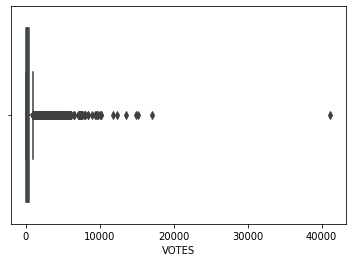

In [27]:
sns.boxplot(df['VOTES'])

In [28]:
li=[]
for i in df.VOTES:
    li.append(i)
print(sorted(li,reverse=True))

[41186, 17060, 15205, 14910, 13500, 12307, 11753, 10192, 10159, 9976, 9698, 9669, 9506, 9300, 9005, 8458, 8421, 8002, 7991, 7926, 7653, 7595, 7549, 7410, 7405, 7354, 7346, 7308, 7302, 7275, 7245, 7192, 7137, 7063, 6508, 6464, 6457, 6163, 6086, 6002, 5984, 5966, 5943, 5854, 5849, 5844, 5812, 5724, 5647, 5627, 5559, 5553, 5469, 5460, 5449, 5403, 5372, 5320, 5229, 5227, 5223, 5163, 5148, 5090, 4990, 4980, 4976, 4960, 4920, 4878, 4876, 4853, 4844, 4829, 4814, 4801, 4792, 4772, 4761, 4755, 4678, 4664, 4639, 4635, 4635, 4634, 4606, 4603, 4583, 4583, 4582, 4569, 4551, 4522, 4501, 4489, 4478, 4476, 4462, 4456, 4449, 4403, 4305, 4285, 4276, 4252, 4238, 4206, 4205, 4186, 4181, 4177, 4173, 4172, 4171, 4155, 4147, 4140, 4121, 4119, 4069, 4064, 4026, 4024, 3999, 3972, 3968, 3913, 3899, 3894, 3878, 3872, 3871, 3863, 3815, 3807, 3795, 3791, 3782, 3775, 3767, 3765, 3738, 3738, 3738, 3713, 3708, 3695, 3689, 3627, 3618, 3601, 3601, 3580, 3569, 3544, 3537, 3536, 3508, 3505, 3504, 3503, 3474, 3471, 3464, 

In [29]:
df.VOTES.mean()

383.5638946433856

In [30]:
df[df["VOTES"]==41186]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
7262,Hyderabad,750.0,"Biryani, Hyderabadi, North Indian, Seafood",Nallakunta,4.4,1534,"11:30am – 11:30pm (Mon-Sat),11:30am – 12midnig...",CASUAL DINING,41186


In [31]:
df.drop([7262],inplace=True)

In [32]:
df[df["VOTES"]==41186]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES


In [33]:
df.VOTES.mean()

381.14869184325795

In [34]:
df.VOTES.std()

743.5224740108902

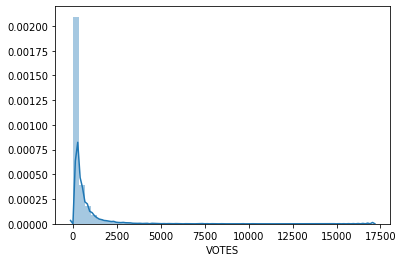

In [35]:
sns.distplot(df.VOTES)

In [36]:
outlier=[]
for i in df.VOTES:
    zscore=(i-df.VOTES.mean())/df.VOTES.std()
    outlier.append(abs(zscore))
    

In [37]:
sorted(outlier,reverse=True)

[22.432208697315655,
 19.937327823045226,
 19.54056779182702,
 17.64418933752982,
 16.03966487229822,
 15.29456298316301,
 13.195097190852424,
 13.15071386532632,
 12.904588151045195,
 12.530692257219222,
 12.491688728726585,
 12.272461999612796,
 11.995402452389232,
 11.598642421171025,
 10.862955176844382,
 10.81319205428481,
 10.249658315029118,
 10.234863873187082,
 10.14744217139324,
 9.780271023859102,
 9.702263966873828,
 9.640396300988954,
 9.453448354075968,
 9.446723607784135,
 9.378131195607427,
 9.367371601540492,
 9.316263529722555,
 9.308193834172354,
 9.27188020419645,
 9.231531726445445,
 9.160249415752004,
 9.08627720654183,
 8.986750961422686,
 8.240304123029109,
 8.18112635566097,
 8.171711710852401,
 7.776296628892561,
 7.672735535998316,
 7.559759798295505,
 7.535550711644902,
 7.5113416249943,
 7.480407792051863,
 7.360707308057218,
 7.353982561765383,
 7.347257815473549,
 7.304219439205811,
 7.1858639044695325,
 7.082302811575288,
 7.055403826407952,
 6.963947276

In [38]:
zscore_3=[]
for i in outlier:
    if i <3:
        zscore_3.append(i)
        

In [39]:
len(zscore_3)

16578

In [40]:
len(outlier)

16894

In [41]:
outliers=[]

def detect_outliers(data,threshold):
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers,len(outliers)

In [42]:
detect_outliers(df["VOTES"],3)

([4478,
  13500,
  4792,
  2834,
  4635,
  4173,
  3226,
  5469,
  2978,
  2741,
  2675,
  2662,
  2777,
  2982,
  3791,
  3367,
  4238,
  2944,
  4252,
  2635,
  2941,
  7275,
  2755,
  2627,
  3129,
  4140,
  5229,
  4522,
  2683,
  2971,
  2646,
  2714,
  3334,
  9300,
  3689,
  3371,
  4853,
  3369,
  3227,
  3695,
  3034,
  2676,
  4024,
  5647,
  4801,
  3504,
  2808,
  2795,
  2711,
  2750,
  5227,
  2956,
  4878,
  3580,
  3193,
  2731,
  4582,
  3321,
  7346,
  3256,
  3038,
  2741,
  3194,
  9005,
  8458,
  3027,
  2791,
  3009,
  3871,
  4635,
  3815,
  3276,
  9506,
  7354,
  7926,
  2811,
  2781,
  3357,
  3279,
  2837,
  2873,
  2897,
  3242,
  3061,
  12307,
  4147,
  2881,
  5403,
  3007,
  7302,
  3324,
  4583,
  4844,
  3052,
  4634,
  3782,
  2694,
  2891,
  4501,
  4276,
  2799,
  2705,
  3999,
  2954,
  7192,
  3464,
  2751,
  9669,
  2883,
  2651,
  3537,
  4449,
  3765,
  4206,
  3471,
  2989,
  3894,
  3863,
  3378,
  3113,
  4205,
  3325,
  3627,
  3708,
  3234

In [43]:
len(outliers)

316

In [44]:
df[df.VOTES.isin (outliers)]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
186,Mumbai,1800.0,"North Indian, Continental, Italian",Santacruz West,4.6,2004,12noon – 1am (Mon-Sun),"CASUAL DINING,BAR",4478
196,New Delhi,1300.0,"Continental, American, Asian, North Indian, Ch...",Hauz Khas Village,4.6,5646,11am – 12:30AM (Mon-Sun),"LOUNGE,CASUAL DINING",13500
293,New Delhi,400.0,"Bakery, Fast Food, Desserts",Connaught Place,4.3,15190,11am – 8pm (Mon-Sun),BAKERY,4792
303,Mumbai,1500.0,"North Indian, Continental, Chinese, Seafood",Powai,3.7,11025,"12noon – 3:30pm, 6:30pm – 12:30AM (Mon-Sun)","CASUAL DINING,BAR",2834
304,Gurgaon,1500.0,"Bar Food, Modern Indian",Sector 29,4.3,10512,12:30pm – 1am (Mon-Sun),MICROBREWERY,4635
344,Bangalore,1400.0,"Seafood, Goan, North Indian, Continental, Asian",Sarjapur Road,4.3,13780,12noon – 1am (Mon-Sun),"CASUAL DINING,BAR",4173
354,New Delhi,1200.0,"Portuguese, Wraps, Burger, Salad",Connaught Place,4.2,9298,11:30am – 11:45pm (Mon-Sun),CASUAL DINING,3226
431,Bangalore,1600.0,"European, Italian, American, Salad, Juices, Ca...",Indiranagar,4.6,12345,9am – 1am (Mon-Sun),CASUAL DINING,5469
510,Bangalore,1300.0,"Russian, Continental, North Indian",Indiranagar,4.2,14507,12noon – 12:30AM (Mon-Sun),PUB,2978
564,Maharashtra,1500.0,"Asian, Thai, Chinese",Mumbai,4.5,8351,12noon – 11:30pm (Mon-Sun),CASUAL DINING,2741


In [45]:
df=df[~df.VOTES.isin (outliers)]

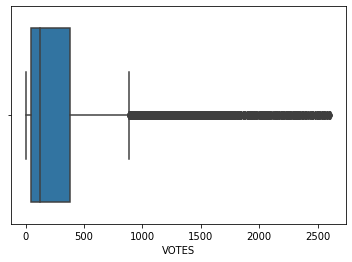

In [46]:
sns.boxplot(df.VOTES)

In [47]:
df.VOTES.std()

429.0939529116685

In [48]:
df.VOTES.mean()

306.82422487634216

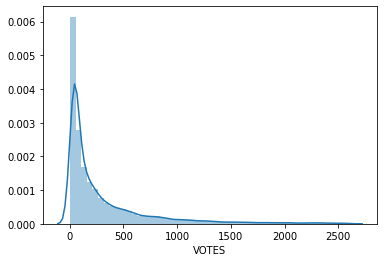

In [49]:
sns.distplot(df["VOTES"])

In [50]:
df.sample(5)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
4563,Chennai,1000.0,Finger Food,St. Thomas Mount,2.5,12043,"Closed (Mon-Tue),9pm – 12midnight (Wed),12midn...",PUB,107
4492,Chennai,500.0,"North Indian, Kebab, Chinese",Anna Nagar West,3.3,7845,"11am – 11pm (Mon-Sat),5pm – 11pm (Sun)",CASUAL DINING,56
1504,Chennai,NaN,"South Indian, North Indian, Chinese",West Mambalam,3.9,1377,7am – 11pm (Mon-Sun),QUICK BITES,104
7020,Hyderabad,700.0,"North Indian, Chinese, Biryani",Kukatpally,2.6,8087,11am – 11pm (Mon-Sun),CASUAL DINING,1661
137,Mumbai,NaN,"Continental, Street Food",Fort,4.0,10045,12noon – 4am (Mon-Sun),None,478


## Rating

In [51]:
df.RATING.nunique()

32

In [52]:
df.RATING.value_counts()

3.9    1621
3.8    1594
4.0    1465
3.7    1433
3.6    1259
4.1    1186
3.5     985
NEW     927
4.2     923
3.4     776
4.3     699
-       671
3.3     484
4.4     444
3.2     349
3.1     263
2.9     242
4.5     237
3.0     229
2.8     190
4.6     155
2.7     129
2.6      85
4.7      70
2.5      51
4.8      36
2.4      24
4.9      22
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64

In [53]:
df.RATING.isna().sum()

4

In [54]:
df.RATING.mode()[0]

'3.9'

In [55]:
df[df.RATING=='NEW']

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
62,Kochi,200.0,"North Indian, Beverages",Kalamassery,NEW,7841,11am – 11pm (Mon-Sun),QUICK BITES,44
69,New Delhi,200.0,"Pizza, Fast Food",Kalkaji,NEW,11096,11am – 11pm (Mon-Sun),None,44
111,Mumbai,800.0,"Gujarati, Rajasthani, North Indian",Borivali West,NEW,7095,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,44
117,New Delhi,500.0,"North Indian, Chinese",Dwarka,NEW,8091,11am – 11pm (Mon-Sun),QUICK BITES,44
120,Bangalore-560066,150.0,"North Indian, South Indian",Whitefield,NEW,4993,"7:30am – 9:30pm (Mon-Sat),Closed (Sun)",QUICK BITES,44
165,Mumbai,300.0,"American, Fast Food",Malad West,NEW,10292,11am – 11pm (Mon-Sun),QUICK BITES,44
194,Bangalore,300.0,"North Indian, Chinese, Biryani",Marathahalli,NEW,4666,11am – 11pm (Mon-Sun),QUICK BITES,44
212,Bangalore,300.0,South Indian,Sahakara Nagar,NEW,7426,12noon – 11pm (Mon-Sun),QUICK BITES,44
214,Thane,300.0,BBQ,Ambernath,NEW,1480,"6:30pm – 10:30pm (Mon, Wed, Thu, Fri, Sat, Sun...",FOOD TRUCK,44
215,New Delhi,200.0,Fast Food,Tilak Nagar,NEW,12879,2pm – 2am (Mon-Sun),None,44


In [56]:
df[df['RATING']=='-']

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
13,Kochi,400.0,South Indian,Edappally,-,4319,11am – 11:30pm (Mon-Sun),CASUAL DINING,44
85,Bangalore,300.0,"North Indian, South Indian",Vijay Nagar,-,12657,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",QUICK BITES,44
156,Kochi,400.0,South Indian,Vyttila,-,6302,6am – 8pm (Mon-Sun),QUICK BITES,44
178,Kochi,400.0,"Indian, Chinese",Vennala,-,14064,12noon – 11:30pm (Mon-Sun),CASUAL DINING,44
235,Kochi,50.0,Kerala,Near Marine Drive,-,14990,8am – 7pm (Mon-Sun),QUICK BITES,44
253,Kochi,150.0,Juices,Edappally,-,6840,11am – 10pm (Mon-Sun),"BEVERAGE SHOP,FOOD COURT",44
329,Kochi,350.0,"North Indian, South Indian",Fort Kochi,-,722,7:30am – 10pm (Mon-Sun),CASUAL DINING,44
369,Edappally,200.0,"North Indian, South Indian",Near Oberon Mall,-,7004,10am – 10pm (Mon-Sun),CASUAL DINING,44
374,Kadavanthra,500.0,"Arabian, Kerala",SCB road,-,944,12noon – 10pm (Mon-Sun),CASUAL DINING,44
392,Kochi,200.0,"Fast Food, Beverages, Rolls",Mattancherry,-,10416,12noon – 1am (Mon-Sun),QUICK BITES,44


In [57]:
df[df['VOTES']==44]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
13,Kochi,400.0,South Indian,Edappally,-,4319,11am – 11:30pm (Mon-Sun),CASUAL DINING,44
41,Bangalore,300.0,"North Indian, Chinese",Ulsoor,3.8,6567,12:30pm – 11pm (Mon-Sun),QUICK BITES,44
62,Kochi,200.0,"North Indian, Beverages",Kalamassery,NEW,7841,11am – 11pm (Mon-Sun),QUICK BITES,44
69,New Delhi,200.0,"Pizza, Fast Food",Kalkaji,NEW,11096,11am – 11pm (Mon-Sun),None,44
85,Bangalore,300.0,"North Indian, South Indian",Vijay Nagar,-,12657,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",QUICK BITES,44
111,Mumbai,800.0,"Gujarati, Rajasthani, North Indian",Borivali West,NEW,7095,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,44
117,New Delhi,500.0,"North Indian, Chinese",Dwarka,NEW,8091,11am – 11pm (Mon-Sun),QUICK BITES,44
120,Bangalore-560066,150.0,"North Indian, South Indian",Whitefield,NEW,4993,"7:30am – 9:30pm (Mon-Sat),Closed (Sun)",QUICK BITES,44
156,Kochi,400.0,South Indian,Vyttila,-,6302,6am – 8pm (Mon-Sun),QUICK BITES,44
165,Mumbai,300.0,"American, Fast Food",Malad West,NEW,10292,11am – 11pm (Mon-Sun),QUICK BITES,44


In [58]:
df.RATING.replace({'NEW':np.nan,"-":np.nan},inplace=True)

In [59]:
df.isna().sum()

CITY              147
COST             4150
CUISINES            0
LOCALITY          128
RATING           1602
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES               0
dtype: int64

In [60]:
df.RATING=df.RATING.astype('float')

In [61]:
df.groupby(df['VOTES']).mean()

,COST,RATING,RESTAURANT_ID,VOTES
VOTES,,,,
3,NaN,3.300000,11069.000000,3
4,490.980392,3.165333,7944.506667,4
5,398.809524,3.189655,7507.086207,5
6,375.666667,3.204598,7733.850575,6
7,442.592593,3.240000,7365.685714,7
8,392.592593,3.260563,8112.802817,8
9,358.512195,3.278462,8032.907692,9
10,422.916667,3.301724,7563.551724,10
11,357.441860,3.385246,6964.721311,11


In [62]:
df.groupby('RATING').agg('mean')

,COST,RESTAURANT_ID,VOTES
RATING,,,
2.0,700.000000,11982.500000,318.000000
2.1,916.666667,7902.500000,251.000000
2.2,650.000000,6046.500000,159.250000
2.3,485.000000,7349.866667,166.000000
2.4,653.333333,6700.125000,161.375000
2.5,554.285714,7584.823529,137.313725
2.6,572.131148,7997.917647,174.811765
2.7,494.494382,7674.767442,126.829457
2.8,446.827586,7311.068421,147.342105


In [63]:
df.RATING.fillna(0,inplace=True)

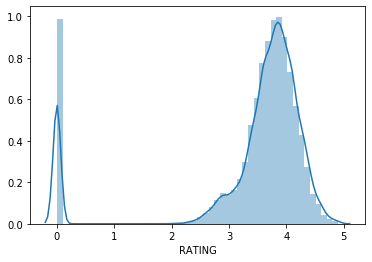

In [64]:
sns.distplot(df.RATING)

In [65]:
print("Mean:",df.RATING.mean())
print("Mode: ",df.RATING.mode())
print("MEDIAN :",df.RATING.median())
print("STD :",df.RATING.std())

Mean: 3.4085716009168947
Mode:  0    3.9
dtype: float64
MEDIAN : 3.8
STD : 1.184308335046716


In [66]:
## FILL NA BY MEDIAN

In [67]:
df.RATING.replace({0:np.nan},inplace=True)

In [68]:
df.RATING.fillna(df.RATING.median(),inplace=True)

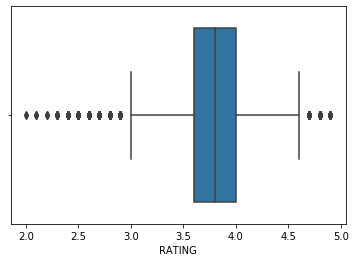

In [69]:
sns.boxplot(df.RATING)

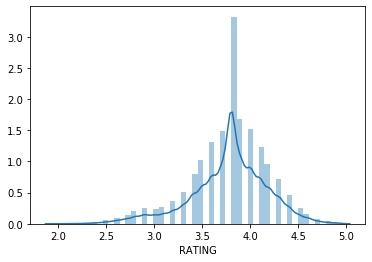

In [70]:
sns.distplot(df.RATING)

In [71]:
print("Mean:",df.RATING.mean())
print("Mode: ",df.RATING.mode())
print("MEDIAN :",df.RATING.median())
print("STD :",df.RATING.std())

Mean: 3.77578115574871
Mode:  0    3.8
dtype: float64
MEDIAN : 3.8
STD : 0.39968061493832857


## CORRELATION

In [72]:
df.corr()['COST']

COST             1.000000
RATING           0.305929
RESTAURANT_ID    0.042121
VOTES            0.333636
Name: COST, dtype: float64

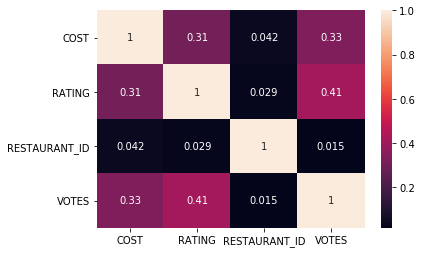

In [73]:
sns.heatmap(df.corr(),annot=True)

## VIF

In [74]:
import statsmodels.api as sm

In [75]:
df.select_dtypes(include=np.number).head()

,COST,RATING,RESTAURANT_ID,VOTES
0,1200.0,3.6,9438,49
1,1500.0,4.2,13198,30
2,800.0,3.8,10915,221
3,800.0,4.1,6346,24
4,300.0,3.8,15387,165


In [76]:
input_df=df[['VOTES','RATING','RESTAURANT_ID']]

In [77]:
for i in range(0,len(input_df.columns)):
    y=input_df.loc[:,input_df.columns==input_df.columns[i]]
    x=input_df.loc[:,input_df.columns != input_df.columns[i]]
    model=sm.OLS(y,x)
    results=model.fit()
    rsqr=results.rsquared
    vif=round(1/(1-rsqr),2)
    print("R Squared value of {} column is {}".format(input_df.columns[i],rsqr))
    print("VIF of {} column is {} \n".format(input_df.columns[i],vif))

R Squared value of VOTES column is -8.02347101241275
VIF of VOTES column is 0.11 

R Squared value of RATING column is 0.7847669471806447
VIF of RATING column is 4.65 

R Squared value of RESTAURANT_ID column is 0.7444470284342384
VIF of RESTAURANT_ID column is 3.91 



## TIME

In [78]:
df.TIME.nunique()

3233

In [79]:
df.TIME.value_counts()

11am – 11pm (Mon-Sun)                                 1850
12noon – 12midnight (Mon-Sun)                          601
12noon – 11pm (Mon-Sun)                                528
11am – 12midnight (Mon-Sun)                            413
10am – 10pm (Mon-Sun)                                  288
10am – 11pm (Mon-Sun)                                  256
7am – 11pm (Mon-Sun)                                   251
8am – 11pm (Mon-Sun)                                   234
12noon – 1am (Mon-Sun)                                 226
24 Hours (Mon-Sun)                                     216
12noon – 11:30pm (Mon-Sun)                             201
11am – 10pm (Mon-Sun)                                  200
11:30am – 11:30pm (Mon-Sun)                            197
11am – 11:30pm (Mon-Sun)                               194
9am – 11pm (Mon-Sun)                                   166
11am – 1am (Mon-Sun)                                   149
11:30am – 11pm (Mon-Sun)                               1

In [80]:
df.TIME.head()

0    11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
1                      6pm – 11pm (Mon-Sun)
2       11am – 3:30pm, 7pm – 11pm (Mon-Sun)
3                   11:30am – 1am (Mon-Sun)
4                      11am – 1am (Mon-Sun)
Name: TIME, dtype: object

In [81]:
df.TIME.replace({"Not Available":np.nan},inplace=True)

In [82]:
df.TIME.dropna(inplace=True)

In [83]:
df.TIME.sample(5)

3837     10am – 2pm, 4pm – 10pm (Mon-Sun)
1808              12noon – 11pm (Mon-Sun)
6568              9:30am – 11pm (Mon-Sun)
381                 11am – 11pm (Mon-Sun)
11059          9am – 12midnight (Mon-Sun)
Name: TIME, dtype: object

In [96]:
days=[]
for i in df.TIME:
    if ("(" in i):
        op=i.split("(")[1].replace(")","")
#         op=op.replace(","," ")
        print(op)
        days.append(op)
    else:
        days.append("NO_DAYS")
        

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Fri, Sun...
Mon-Sun
Mon-Sun
Mon,11am – 11pm 
Mon, Tue, Wed, Thu, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon,9am – 10pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,12:30pm – 11:30pm...
Mon,12noon – 3pm, 6pm – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,8am – 7pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,9:30am – 11:45pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Fri, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,12:30pm...
Mon, Tue, Wed, Thu, Sun, 11am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,11:30am – 1am 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,7:30am – 10:30pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, S

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,Closed 
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun, Closed...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,12noon –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,11am...
Mon-Sun
Mon-Sun
Mon,10:30am – 7:30pm...
Mon-Sun
Mon-Sun
Mon-Thu,12noon –...
Mon-Sat,8am – 12midnight...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,12noon – 1am...
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun, 12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun, Closed...
Mon-Sat,1pm – 10:30pm 
Mon,12noon – 10pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon,10:30am – 12midnight...
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Fri, Sat, Sun, 6pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun


Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun, 1pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,11:30am – 11pm...
Mon-Sun
Mon,12noon – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,8am – 11pm 
Mon-Sun
Mon-Fri,11am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu...
Mon-Sat,7am – 12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,10am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,11am – 4am 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Fri, Sat, Sun, 10am...
Mon-Sun
Mon-Su

Mon-Sun
Mon,12:30pm – 10pm 
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sat, Sun, 10am...
Mon-Sun
Mon-Thu,8am – 10:30pm 
Mon-Thu,12noon – 1am...
Mon-Sun
Mon-Sun
Mon-Thu,12noon – 12midnight...
Mon,12noon – 4pm, 7pm – 11pm 
Mon-Sun
Mon, Wed, Thu, Fri, Sun, Closed...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun, Closed...
Mon-Sun
Mon-Sun
Mon-Fri,8am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,8:30am – 1am 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat, 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,7am –...
Mon, Wed, Thu, Fri...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun, 12noon...
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,2pm – 11:30pm 
Mo

Mon-Sat,8am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,7am – 11:45pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11am – 11pm 
Mon-Sun
Mon-Sun
Mon-Fri,12noon – 1am...
Mon, Tue, Thu, Fri, Sat, 9:15am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun, 11am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri...
Mon-Sun
Mon-Sun
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,12noon – 3pm, 7pm – 12midnight...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun


Mon,8am – 11pm 
Mon-Sat,10am – 9pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon,10:30am – 11:45pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,12noon – 11:30pm 
Mon-Thu,12midnight – 1am, 11am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,9am – 9pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,11am – 12midnight 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,9am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,7:30am – 12:30pm, 4:30pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,9am – 1pm 
Mon-Thu,12noon – 12midnight...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Fri, 11am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,10am – 10pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun, 12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun...
Mon-Thu,10am – 1:30am 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11am – 7pm 
Mon-Thu,11am – 4am 
Mon

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11am – 3pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,9am – 11pm 
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Fri, Closed...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,2pm – 11pm 
Mon-Sun
Mon-Sun
Mon, Wed, Fri, Sat, Sun, 12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,7am – 2pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,11:30am – 11:30pm 
Mon-Sun
Mon, Tue, Wed, Thu...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun


Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,5:30pm – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,12:30pm – 11:30pm 
Mon-Sun
Mon-Sun
Mon-Sat,12noon – 9pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,12noon – 3pm, 6:30pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sat, Sun...
Mon-Fri,12noon – 12midnight...
Mon-Sun
Mon-Sun
Mon, Sat, Sun, 11am – 11pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,12noon –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Wed,7am – 11:55pm 
Mon-Fri,1pm – 11:30pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-S

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sat...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Sat, 6am – 10pm 
Mon-Sat,Closed 
Mon,10am – 12midnight 
Mon-Thu,12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11:30am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,11am – 10:30pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,12noon –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun, Closed...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,Closed 

Mon-Sun
Mon-Sun
Mon-Fri,7:30am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,1pm – 12:30AM 
Mon, Tue, Wed, Thu, Sat, Sun, 2pm...
Mon,12noon – 4pm, 7pm – 11pm 
Mon-Sun
Mon, Tue, Sun, 12noon – 1am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Closed...
Mon-Sun
Mon-Sun
Mon, Fri, Sat, 10am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Fri, Sun, 11am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-S

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sat, Sun, 11am...
Mon-Sun
Mon, Thu, Fri, Sat, Sun, 9am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,11:30am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,6pm – 10pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,10am – 10pm 
Mon-Sun
Mon-Fri,11am...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,11:30am – 12midnight...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,7:30am – 11:30pm 
Mon-Sun
Mon-Sun
Mon,11am – 10:30pm 
Mon, Tue, Wed, Thu, Sun, 12noon...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat, Sun, Closed...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Thu, Fri, 12midnight – 1am, 6pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Wed, Thu, Fri, Sat...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,11:30am – 12:30AM...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,7pm – 1am 
Mon-Sun
Mon-Sun
Mon,12noon –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11am...
Mon-Sun
Mon,11am – 11:52pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,12:30pm – 3:30pm, 6:30pm – 10:30pm...
Mon-Sun
Mon-Fri,7am – 11pm 
Mon-Sun
Mon-Sun
Mon,11am – 4:30pm, 6:30pm – 11pm...
Mon-Sun
Mon,8pm – 12midnight...
Mon-Sun
Mon-Sun
Mon,12noon – 11:30pm 
Mon-Sun
Mon-Su

Mon, Tue, Wed, Thu, Sun, 11am –...
Mon-Fri,12noon – 12midnight...
Mon-Sun
Mon-Sun
Mon-Thu,12noon –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,6am – 12midnight 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,11am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,12:30pm...
Mon-Sun
Mon-Sun
Mon, Tue, Thu, Fri, Sat, Sun, 12:5AM –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun...
Mon-Sun
Mon-Sun
Mon,11am – 10pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Sun, 11am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun, 11am –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon...
Mon-Sun
Mon-Sun
Mon-Sat,Closed...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-

Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Thu, Sun, 12noon...
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Fri, Sat, Sun...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon, Tue, Wed, Fri, Sat, Sun, 4pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,8am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,6:30pm – 12midnight...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,8am – 10pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Fri,12noon – 2:30pm, 7:30pm...
Mon, Tue, Wed, Thu, Sat...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,8pm – 11:30pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,11:30am – 11pm...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,7:30pm – 11:45pm...
Mo

Mon-Sun
Mon-Fri,9am – 11pm 
Mon-Sun
Mon-Sun
Mon-Fri,11am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,11am – 12midnight 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,7:30am – 10:30pm 
Mon-Sun
Mon-Sun
Mon,12noon – 11pm 
Mon-Sat,11:30am...
Mon, Tue, Wed, Thu, Sun, 12midnight...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,11am – 11pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,12noon –...
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Thu,7:30am – 9:30pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,11:25am – 9:35pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon-Sat,Closed 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,11am – 11pm 
Mon,7:30pm – 11:30pm 
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon-Sun
Mon,7am – 10pm 
Mon-Sun
Mon-Su

In [97]:
len(days)

16494

In [86]:
no_days=[]
for i in df.TIME:
    if ("(" not in i):
        no_days.append(i)

In [87]:
len(no_days)

149

In [91]:
no_days

['12:30pm – 3:30pm, 7:30pm – 9:30pm...',
 '7am – 11am, 5pm – 10:30pm, 12:30pm – 4pm...',
 '6:30am – 10:30am, 12:30pm – 3:30pm, 6:30pm –...',
 '12noon – 3:30pm, 4pm – 6:30pm, 7pm – 11:30pm...',
 '8am – 11am, 12:45pm – 3:30pm, 7pm – 11pm...',
 '8am – 11am, 12noon – 3pm, 7:30pm – 12midnight...',
 '7am – 10:30am, 12noon – 3pm, 7pm – 10:30pm...',
 '8am – 11am, 12:30pm – 3:30pm, 7:30pm –...',
 '12noon – 3:30pm, 7pm – 12midnight...',
 '7am – 10:30am, 12noon – 3:30pm, 7pm – 10:30pm...',
 '11:30am – 3:30pm, 6:30pm – 11pm...',
 '6:30am – 10:30am, 12:30pm – 3pm, 6pm – 11:30pm...',
 '7am – 10am, 12:30pm – 3pm, 7pm – 10:30pm...',
 '7:30am – 10am, 12:30pm – 3pm, 4pm – 11pm...',
 '6am – 12noon, 2:30pm – 4pm, 7pm – 10:30pm...',
 '7am – 11am, 12:30pm – 3:30pm, 7pm – 10pm...',
 '12:30pm – 2:45pm, 7pm – 11:30pm...',
 '12midnight – 12:30AM, 11:30am – 12midnight...',
 '7am – 10:30am, 11:30am – 3:30pm, 7pm – 10:30pm...',
 '12noon – 3:30pm, 7pm – 12midnight...',
 '12midnight – 1am, 6pm – 12midnight...',
 '12

In [94]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165


In [98]:
# df[~df['TIME'].isin (no_days)]

In [99]:
df["DAYS"]=pd.DataFrame(days,columns=['DAYS'])

In [100]:
df["DAYS"].shape

(16578,)

In [101]:
df[["TIME","DAYS"]].sample(5)

,TIME,DAYS
1039,"11am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 3p...",Mon-Sun
4472,"10:30am – 11:30pm (Mon-Thu),10:30am – 12:30AM...",Mon-Sun
1558,11am – 10pm (Mon-Sun),Mon-Sun
8657,"9am – 5pm (Mon-Fri),9am – 3pm (Sat),9am – 1pm...",Mon-Sun
2059,12noon – 12midnight (Mon-Sun),Mon-Sun


In [102]:
df["DAYS"].value_counts().head(6)

Mon-Sun                                    14248
NO_DAYS                                      139
Mon-Sat,Closed                               132
Mon, Wed, Thu, Fri, Sat, Sun...               95
Mon, Tue, Wed, Thu, Sun...                    49
Mon, Wed, Thu, Fri, Sat, Sun, Closed...       45
Name: DAYS, dtype: int64

In [103]:
df.DAYS.nunique()

803

In [104]:
df.DAYS.value_counts().head(5).sum()

14663

In [105]:
top_days=df.DAYS.value_counts().head(5).index

In [106]:
days_5=[]

for i in df.DAYS:
    if i in top_days:
        days_5.append(i)
    else:
        days_5.append('Others')

In [107]:
df['DAYS_PR']=days_5

In [108]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,DAYS,DAYS_PR
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Mon-Sun,Mon-Sun
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Mon-Sun,Mon-Sun
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,Mon-Sun,Mon-Sun
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Mon-Sun,Mon-Sun
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,Mon-Sun,Mon-Sun


In [109]:
df["TIME"]

0                  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
1                                    6pm – 11pm (Mon-Sun)
2                     11am – 3:30pm, 7pm – 11pm (Mon-Sun)
3                                 11:30am – 1am (Mon-Sun)
4                                    11am – 1am (Mon-Sun)
5                              12noon – 12:30AM (Mon-Sun)
6       12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...
7                                     1pm – 1am (Mon-Sun)
8                                 7am – 10:30pm (Mon-Sun)
9                     11am – 2pm, 4pm – 10:30pm (Mon-Sun)
10                            12:30pm – 12:30AM (Mon-Sun)
11       11am – 12:15AM (Mon, Tue, Wed, Thu, Fri, Sun)...
12                                  11am – 11pm (Mon-Sun)
13                               11am – 11:30pm (Mon-Sun)
14                     Closed (Mon),11am – 11pm (Tue-Sun)
15         11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...
16                          7:30am – 12midnight (Mon-Sun)
17            

In [110]:
for i in df.TIME:
    if ("(" in i):
        op=i.split("(")[0]
        print(op)

11am – 4pm, 7:30pm – 11:30pm 
6pm – 11pm 
11am – 3:30pm, 7pm – 11pm 
11:30am – 1am 
11am – 1am 
12noon – 12:30AM 
12noon – 11:30pm 
1pm – 1am 
7am – 10:30pm 
11am – 2pm, 4pm – 10:30pm 
12:30pm – 12:30AM 
11am – 12:15AM 
11am – 11pm 
11am – 11:30pm 
Closed 
11:30am – 11:30pm 
7:30am – 12midnight 
11am – 12midnight 
11am – 11:45pm 
Closed 
9:30am – 10pm 
10:30am – 11:30pm 
11am – 3am 
11am – 3:30pm, 7pm – 11pm 
11am – 11pm 
12noon – 11pm 
12:30pm – 11pm 
Closed 
11am – 11pm 
12:30pm – 1am 
7am – 10pm 
8am – 11pm 
10am – 12midnight 
7am – 10pm 
6am – 11pm 
24 Hours 
9:30am – 11:30pm 
8:30am – 11pm 
12noon – 11pm 
10am – 11pm 
12noon – 10:30pm 
12:30pm – 11pm 
4pm – 12midnight 
11am – 12midnight 
11am – 11pm 
12:30pm – 11pm 
24 Hours 
12noon – 1am 
12:30pm – 3:30pm, 7pm – 11pm 
11am – 11pm 
8am – 12midnight 
11am – 11pm 
9am – 12:30AM 
12noon – 10pm 
11:30am – 11:30pm 
10am – 9pm 
12noon – 4am 
6am – 10pm 
12noon – 3:30pm, 7pm – 10pm 
7am – 11:30pm 
7:30am – 11:30pm 
12noon – 12midnight 
1

TypeError: argument of type 'float' is not iterable

In [111]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,DAYS,DAYS_PR
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Mon-Sun,Mon-Sun
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Mon-Sun,Mon-Sun
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,Mon-Sun,Mon-Sun
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Mon-Sun,Mon-Sun
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,Mon-Sun,Mon-Sun


## TITLE

In [112]:
df.TITLE.head()

0        CASUAL DINING
1    CASUAL DINING,BAR
2        CASUAL DINING
3          QUICK BITES
4       DESSERT PARLOR
Name: TITLE, dtype: object

In [113]:
df.TITLE.nunique()

122

In [114]:
df.TITLE.value_counts()

QUICK BITES                     5594
CASUAL DINING                   4792
None                            1283
CAFÉ                             802
DESSERT PARLOR                   505
CASUAL DINING,BAR                426
FINE DINING                      397
BAKERY                           389
BEVERAGE SHOP                    215
BAR,CASUAL DINING                156
BAKERY,QUICK BITES               126
LOUNGE                           124
BAR                              122
FOOD COURT                       110
KIOSK                             73
SWEET SHOP,QUICK BITES            70
MESS                              68
SWEET SHOP                        67
CASUAL DINING,CAFÉ                62
PUB                               62
BAKERY,DESSERT PARLOR             61
DHABA                             61
DESSERT PARLOR,QUICK BITES        57
QUICK BITES,SWEET SHOP            48
CAFÉ,CASUAL DINING                44
BEVERAGE SHOP,QUICK BITES         43
CAFÉ,BAKERY                       43
P

In [115]:
df.TITLE.isna().sum()

0

In [116]:
df.TITLE.value_counts().head(10).sum()

14559

In [117]:
df.TITLE.value_counts(1).head(10).sum()

0.8782120883098083

In [118]:
## nearly 88 % of data were captured by top10 nunique values

In [119]:
top10=df.TITLE.value_counts().head(10).index

In [120]:
top10

Index(['QUICK BITES', 'CASUAL DINING', 'None', 'CAFÉ', 'DESSERT PARLOR',
       'CASUAL DINING,BAR', 'FINE DINING', 'BAKERY', 'BEVERAGE SHOP',
       'BAR,CASUAL DINING'],
      dtype='object')

In [121]:
title_10=[]
def top10_values(col):
    for i in col:
        if i in top10:
            title_10.append(i)
        else:
            title_10.append("Others")
    

In [122]:
top10_values(df.TITLE)

In [123]:
title_10

['CASUAL DINING',
 'CASUAL DINING,BAR',
 'CASUAL DINING',
 'QUICK BITES',
 'DESSERT PARLOR',
 'CASUAL DINING',
 'CAFÉ',
 'Others',
 'QUICK BITES',
 'QUICK BITES',
 'CASUAL DINING',
 'Others',
 'CASUAL DINING',
 'CASUAL DINING',
 'QUICK BITES',
 'Others',
 'CASUAL DINING',
 'CASUAL DINING',
 'CASUAL DINING',
 'Others',
 'CASUAL DINING',
 'QUICK BITES',
 'None',
 'CASUAL DINING',
 'CAFÉ',
 'QUICK BITES',
 'CASUAL DINING',
 'BAR,CASUAL DINING',
 'Others',
 'Others',
 'QUICK BITES',
 'CAFÉ',
 'CAFÉ',
 'QUICK BITES',
 'BEVERAGE SHOP',
 'QUICK BITES',
 'QUICK BITES',
 'CAFÉ',
 'CASUAL DINING',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'QUICK BITES',
 'CASUAL DINING',
 'FINE DINING',
 'CASUAL DINING,BAR',
 'CASUAL DINING',
 'DESSERT PARLOR',
 'CASUAL DINING',
 'CAFÉ',
 'CASUAL DINING',
 'QUICK BITES',
 'QUICK BITES',
 'Others',
 'QUICK BITES',
 'QUICK BITES',
 'CASUAL DINING',
 'CASUAL DINING',
 'CASUAL DINING',
 'CASUAL DINING',
 'QUICK BITES',
 'QUICK 

In [124]:
len(title_10)

16578

In [125]:
len(df['TITLE'])

16578

In [126]:
df['TITLE_PR']=title_10

In [127]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,DAYS,DAYS_PR,TITLE_PR
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Mon-Sun,Mon-Sun,CASUAL DINING
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Mon-Sun,Mon-Sun,"CASUAL DINING,BAR"
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,Mon-Sun,Mon-Sun,CASUAL DINING
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Mon-Sun,Mon-Sun,QUICK BITES
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,Mon-Sun,Mon-Sun,DESSERT PARLOR


## CITY

In [128]:
df.CITY.nunique()

448

In [129]:
df.CITY.value_counts().head(10)

Chennai         2841
Bangalore       2740
Hyderabad       2419
Mumbai          2232
Kochi           1750
New Delhi       1691
Gurgaon          508
Secunderabad     389
Noida            271
Navi Mumbai      219
Name: CITY, dtype: int64

In [130]:
df.CITY.value_counts(1).head(10).sum()

0.9165601606719006

In [131]:
## top 10 contains 91% of data

In [132]:
city_10=df.CITY.value_counts().head(10).index

In [133]:
city_10

Index(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Kochi', 'New Delhi',
       'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai'],
      dtype='object')

In [134]:
top_city=[]

def city(col):
    for i in col:
        if i in city_10:
            top_city.append(i)
        else:
            top_city.append("Other")

In [135]:
city(df.CITY)

In [136]:
len(top_city)

16578

In [137]:
top_city

['Other',
 'Chennai',
 'Chennai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Hyderabad',
 'Bangalore',
 'Bangalore',
 'Kochi',
 'Kochi',
 'Other',
 'Hyderabad',
 'Mumbai',
 'Hyderabad',
 'Other',
 'New Delhi',
 'Hyderabad',
 'New Delhi',
 'New Delhi',
 'Bangalore',
 'New Delhi',
 'Kochi',
 'Bangalore',
 'Chennai',
 'Chennai',
 'Bangalore',
 'Chennai',
 'Gurgaon',
 'Other',
 'Kochi',
 'Chennai',
 'Bangalore',
 'Chennai',
 'Bangalore',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Bangalore',
 'Kochi',
 'Hyderabad',
 'Bangalore',
 'Gurgaon',
 'Hyderabad',
 'Other',
 'Bangalore',
 'Bangalore',
 'Kochi',
 'Bangalore',
 'Other',
 'Bangalore',
 'Bangalore',
 'Kochi',
 'New Delhi',
 'Hyderabad',
 'Other',
 'Chennai',
 'Other',
 'New Delhi',
 'Kochi',
 'Bangalore',
 'Mumbai',
 'Chennai',
 'Bangalore',
 'Mumbai',
 'Kochi',
 'New Delhi',
 'Bangalore',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'Hyderabad',
 'Hyderabad',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 

In [138]:
df['TOP_CITY']=top_city

In [139]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,DAYS,DAYS_PR,TITLE_PR,TOP_CITY
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Mon-Sun,Mon-Sun,CASUAL DINING,Other
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Mon-Sun,Mon-Sun,"CASUAL DINING,BAR",Chennai
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,Mon-Sun,Mon-Sun,CASUAL DINING,Chennai
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Mon-Sun,Mon-Sun,QUICK BITES,Mumbai
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,Mon-Sun,Mon-Sun,DESSERT PARLOR,Mumbai


## Cuisines

In [140]:
df['CUISINES'].value_counts()

North Indian, Chinese                                                      712
North Indian                                                               708
South Indian                                                               698
Fast Food                                                                  363
Chinese                                                                    226
Bakery, Desserts                                                           188
Bakery                                                                     187
South Indian, North Indian, Chinese                                        183
Cafe                                                                       179
Kerala                                                                     178
Biryani                                                                    163
Street Food                                                                159
Chinese, North Indian                               

In [141]:
df.isna().sum()

CITY              147
COST             4150
CUISINES            0
LOCALITY          128
RATING              0
RESTAURANT_ID       0
TIME               84
TITLE               0
VOTES               0
DAYS                0
DAYS_PR             0
TITLE_PR            0
TOP_CITY            0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16578 entries, 0 to 4230
Data columns (total 13 columns):
CITY             16431 non-null object
COST             12428 non-null float64
CUISINES         16578 non-null object
LOCALITY         16450 non-null object
RATING           16578 non-null float64
RESTAURANT_ID    16578 non-null int64
TIME             16494 non-null object
TITLE            16578 non-null object
VOTES            16578 non-null int32
DAYS             16578 non-null object
DAYS_PR          16578 non-null object
TITLE_PR         16578 non-null object
TOP_CITY         16578 non-null object
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1.7+ MB


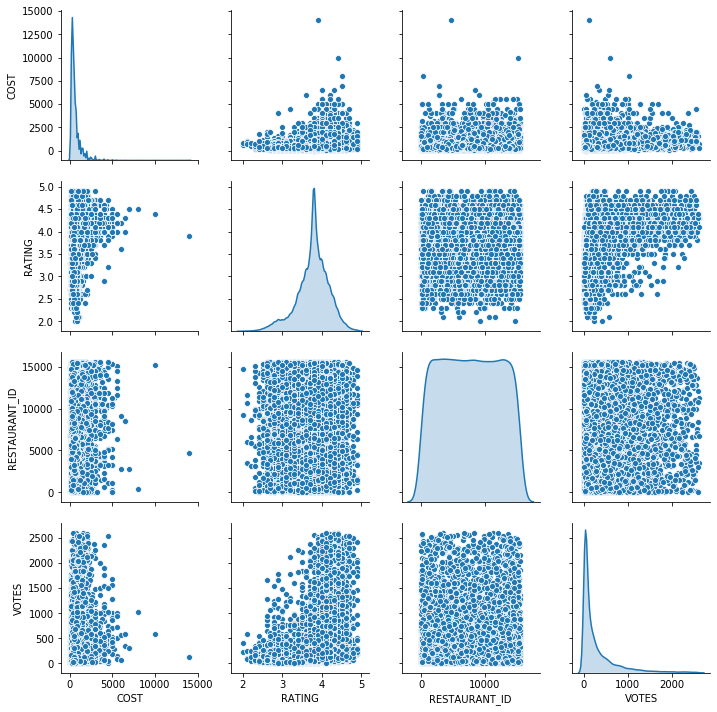

In [143]:
sns.pairplot(df,diag_kind='kde')

In [181]:
df.isna().sum()

CITY              147
COST             4150
CUISINES            0
LOCALITY          128
RATING              0
RESTAURANT_ID       0
TIME               84
TITLE               0
VOTES               0
DAYS                0
DAYS_PR             0
TITLE_PR            0
TOP_CITY            0
dtype: int64

## CAT AND NUMERICAL COLUMN

In [144]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,DAYS,DAYS_PR,TITLE_PR,TOP_CITY
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,Mon-Sun,Mon-Sun,CASUAL DINING,Other
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,Mon-Sun,Mon-Sun,"CASUAL DINING,BAR",Chennai
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,Mon-Sun,Mon-Sun,CASUAL DINING,Chennai
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,Mon-Sun,Mon-Sun,QUICK BITES,Mumbai
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,Mon-Sun,Mon-Sun,DESSERT PARLOR,Mumbai


In [145]:
num_col=df.select_dtypes(include=np.number)

In [146]:
num_col.head()

,COST,RATING,RESTAURANT_ID,VOTES
0,1200.0,3.6,9438,49
1,1500.0,4.2,13198,30
2,800.0,3.8,10915,221
3,800.0,4.1,6346,24
4,300.0,3.8,15387,165


In [147]:
cat_col=df.select_dtypes(exclude=np.number).drop(columns={'CITY','CUISINES','LOCALITY',
                                                 'TITLE','TIME','DAYS'})

In [148]:
cat_col.head()

,DAYS_PR,TITLE_PR,TOP_CITY
0,Mon-Sun,CASUAL DINING,Other
1,Mon-Sun,"CASUAL DINING,BAR",Chennai
2,Mon-Sun,CASUAL DINING,Chennai
3,Mon-Sun,QUICK BITES,Mumbai
4,Mon-Sun,DESSERT PARLOR,Mumbai


In [149]:
cat_col_pr=pd.get_dummies(cat_col)

In [150]:
cat_col_pr.head()

,"DAYS_PR_Mon, Tue, Wed, Thu, Sun...","DAYS_PR_Mon, Wed, Thu, Fri, Sat, Sun...","DAYS_PR_Mon-Sat,Closed",DAYS_PR_Mon-Sun,DAYS_PR_NO_DAYS,DAYS_PR_Others,TITLE_PR_BAKERY,"TITLE_PR_BAR,CASUAL DINING",TITLE_PR_BEVERAGE SHOP,TITLE_PR_CAFÉ,...,TOP_CITY_Chennai,TOP_CITY_Gurgaon,TOP_CITY_Hyderabad,TOP_CITY_Kochi,TOP_CITY_Mumbai,TOP_CITY_Navi Mumbai,TOP_CITY_New Delhi,TOP_CITY_Noida,TOP_CITY_Other,TOP_CITY_Secunderabad
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [151]:
cat_col_pr.shape

(16578, 28)

In [152]:
df_new=pd.concat([num_col,cat_col_pr],axis=1)

In [153]:
df_new.shape

(16578, 32)

In [154]:
df_new.head()

,COST,RATING,RESTAURANT_ID,VOTES,"DAYS_PR_Mon, Tue, Wed, Thu, Sun...","DAYS_PR_Mon, Wed, Thu, Fri, Sat, Sun...","DAYS_PR_Mon-Sat,Closed",DAYS_PR_Mon-Sun,DAYS_PR_NO_DAYS,DAYS_PR_Others,...,TOP_CITY_Chennai,TOP_CITY_Gurgaon,TOP_CITY_Hyderabad,TOP_CITY_Kochi,TOP_CITY_Mumbai,TOP_CITY_Navi Mumbai,TOP_CITY_New Delhi,TOP_CITY_Noida,TOP_CITY_Other,TOP_CITY_Secunderabad
0,1200.0,3.6,9438,49,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1500.0,4.2,13198,30,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,800.0,3.8,10915,221,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,800.0,4.1,6346,24,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,300.0,3.8,15387,165,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## TRAIN TEST SPLIT

In [155]:
train_new=df_new[df_new.COST.notna()]

In [156]:
test_new=df_new[df_new['COST'].isna()]

In [157]:
print(train_new.shape,test_new.shape)

(12428, 32) (4150, 32)


In [158]:
train_x=train_new.drop(columns={'COST','RESTAURANT_ID'})

In [159]:
train_y=train_new['COST']

In [160]:
test_x=test_new.drop(columns={'COST','RESTAURANT_ID'})

In [161]:
test_y=test_new['COST']

In [162]:
print(train_x.shape,test_x.shape)

(12428, 30) (4150, 30)


In [163]:
print(train_y.shape,test_y.shape)

(12428,) (4150,)


## MODEL

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [167]:
linear_model=LinearRegression()
linear_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
test_pred=linear_model.predict(test_x)

In [184]:
train_pred=linear_model.predict(train_x)

In [186]:
np.sqrt(mean_squared_error(train_y,train_pred))

408.1271114097942

In [187]:
print(r2_score(train_y,train_pred))

0.5695203307839134


In [188]:
def model_sel(train_x,train_y,test_x,model):
    model.fit(train_x,train_y)
    test_pred=model.predict(test_x)
    train_pred=model.predict(train_x)
    print("Train RMSE :",np.sqrt(mean_squared_error(train_y,train_pred)))
    print("R squared :",r2_score(train_y,train_pred))
    
    

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [191]:
model_sel(train_x,train_y,test_x,rf)

Train RMSE : 191.58287969496232
R squared : 0.9051417412645697


## Train test split

In [192]:
from sklearn.model_selection import train_test_split


In [193]:
X=train_new.drop(columns={'COST','RESTAURANT_ID'})
y=train_new['COST']

In [194]:
X.shape,y.shape

((12428, 30), (12428,))

In [198]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=10)

In [197]:
rf=RandomForestRegressor()

In [200]:
def model_sel(train_x,train_y,test_x,test_y,model):
    model.fit(train_x,train_y)
    test_pred=model.predict(test_x)
    train_pred=model.predict(train_x)
    print("Train RMSE :",np.sqrt(mean_squared_error(train_y,train_pred)))
    print("Train R squared :",r2_score(train_y,train_pred))
    print("*******************")
    print("Test RMSE :",np.sqrt(mean_squared_error(test_y,test_pred)))
    print("Test R squared :",r2_score(test_y,test_pred))
    
    

In [201]:
model_sel(train_x,train_y,test_x,test_y,rf)

Train RMSE : 183.73911734881023
Train R squared : 0.9096449549599216
*******************
Test RMSE : 467.5108805643012
Test R squared : 0.4767070457351623


In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfc=RandomForestClassifier()

In [204]:
model_sel(train_x, train_y, test_x, test_y,rfc)

Train RMSE : 140.0808024747843
Train R squared : 0.9474822154494742
*******************
Test RMSE : 545.7443049079864
Test R squared : 0.2869173555908936


## Grid Searc CV

In [205]:
from sklearn.model_selection import GridSearchCV

In [214]:
param_grid=[{'max_features':[ 0.2, 0.3, 0.4,0.6,0.8,1 ],
             'min_samples_split': [20,22,24],
             'max_depth' : [7,8,9]
}]

In [215]:
grid=GridSearchCV(rf,param_grid,scoring='r2',cv=10)

In [216]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 1], 'min_samples_split': [20, 22, 24], 'max_depth': [7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [217]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=22,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [218]:
grid.best_score_

0.600254232319848

In [231]:
rf_grid=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=22,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [232]:
model_sel(train_x, train_y, test_x, test_y, rf_grid)

Train RMSE : 358.81474020676353
Train R squared : 0.6554202857356741
*******************
Test RMSE : 428.19018527442415
Test R squared : 0.5610299820678286


In [233]:
Linear_model=LinearRegression()

In [234]:
model_sel(train_x, train_y, test_x, test_y,Linear_model)

Train RMSE : 394.61455381837686
Train R squared : 0.5832310535390972
*******************
Test RMSE : 438.9273460288932
Test R squared : 0.5387390173824372


In [235]:
from sklearn.svm import SVR

In [236]:
svr=SVR()

In [237]:
model_sel(train_x, train_y, test_x, test_y,svr)

Train RMSE : 624.2310735871489
Train R squared : -0.04289340812491149
*******************
Test RMSE : 664.5554169485697
Test R squared : -0.05736236032877384
